# Intro to Linear Regression 
- pandas
- matplotlib
- sklearn

In [1]:
from sklearn.datasets import load_boston

# load boston housing dataset
dataset = load_boston()

# print the dataset's description
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [2]:
import pandas as pd

# make a dataframe with Boston data
df = pd.DataFrame(data=dataset.data)

# display the start of the dataframe
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
# add column names (feature_names) to dataframe 
df.columns = dataset.feature_names

# display the end of the dataframe
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


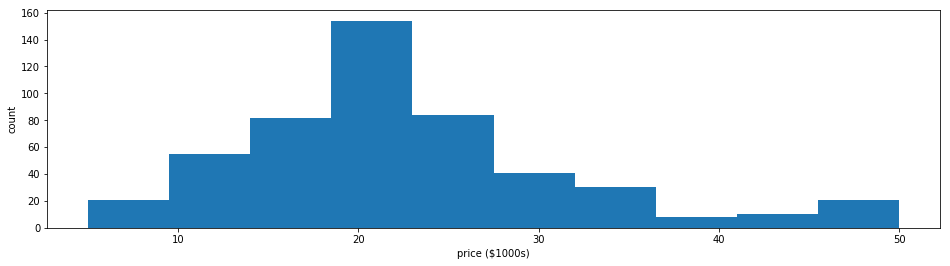

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

# set graph
plt.figure(figsize=(16, 4))
# plot price data to graph
plt.hist(dataset.target)

# set x, y labels
plt.xlabel('price ($1000s)')
plt.ylabel('count')

# output graph
plt.show()

## Linear Regression

- we will be preforming multiple regression
    - the target value (Y) is median housing price
    - all attributes will be considered except median housing price (target)
        - *Y = m1X1 + m2X2 + m3X3 + ... mpXp + b*

In [6]:
# target is median housing price
Y = dataset.target

In [7]:
# mutiple regression so multiple Xs
X = df

In [8]:
from sklearn.model_selection import train_test_split

# split the data, 70:30 train:test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [9]:
# what do our splits look like?
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()

# fit data to model (i.e. train the model)
lr.fit(X_train, y_train)

# make predictions for y values produced by X_test values
y_preds = lr.predict(X_test)

# calculate mean squared error
mse = mean_squared_error(y_test, y_preds)

# how good is our model?
mse

21.917826436062036

### how good is our model?

- compare mse (mean squared error) to average target values
- maybe compare "average mse" to average target value
- and it's always a good idea to visualize, let's graph the model's accuracy 

In [11]:
dataset.target[:7]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9])

In [12]:
print(f"min target value = {dataset.target.min()}")
print(f"mean target value = {dataset.target.mean()}")
print(f"max target value = {dataset.target.max()}")

min target value = 5.0
mean target value = 22.532806324110677
max target value = 50.0


In [13]:
# "average mse"
mse/154

0.14232354828611712

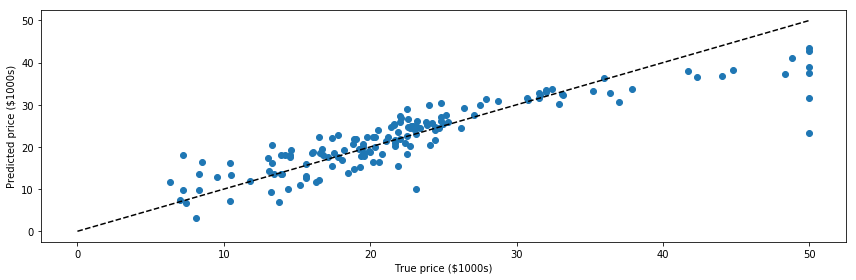

In [14]:
# maybe a graph can help?
plt.figure(figsize=(12, 4))

# scatter plot test Ys and predicted Ys
plt.scatter(y_test, y_preds)

# add ticks (numbers) and dotted line of best fit 
plt.plot([0, 50], [0, 50], '--k')

# label axes
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')

# display graph
plt.tight_layout()

## Continued..
More info on LinearModel: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

More tutorial-like notebooks: https://github.com/gumdropsteve/intro-data-science

Beginner’s Guide to Linear Regression in Python with cuML: https://medium.com/future-vision/beginners-guide-to-linear-regression-in-python-with-cuml-30e2709c761?source=friends_link&sk=1da35920b9e2ffea59d5cb3c998bfeae